In [3]:
# quick start with tensorFlow karas
# https://www.youtube.com/watch?v=wQ8BIBpya2k

import tensorflow as tf
tf.__version__

'1.10.0'

In [4]:
# import test dataset
mnist = tf.keras.datasets.mnist #28x28 hand-written digits 0-9

(x_train,y_train), (x_test,y_test) = mnist.load_data()


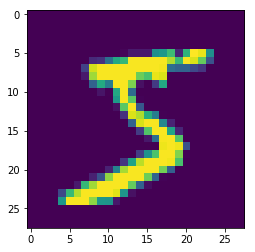

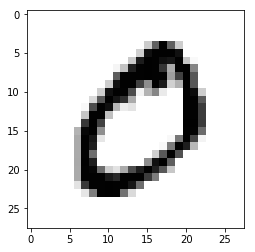

In [5]:
# see input dataset

import matplotlib.pyplot as plt

# print(x_train[0])
plt.imshow(x_train[0]) #color image
plt.show()
plt.imshow(x_train[1], cmap = plt.cm.binary) #non-color image
plt.show()

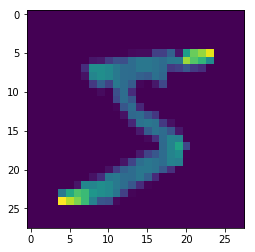

In [6]:
# normalize inputs
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[0]) #color image
plt.show()

In [7]:
# define/select model
model = tf.keras.models.Sequential() # most common
model.add(tf.keras.layers.Flatten()) # [input layer]need to make inputs 28x28 be flat = 784 
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # [hidden layer 1] then decide 激勵函式：relu
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # [hidden layer 2] the same 激勵函式：relu
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) # [output layer] 激勵函式：softmax

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics = ['accuracy']) 
# optimizer 最佳化函式：adam (常用)

model.fit(x_train,y_train, epochs = 3)


Epoch 1/3
60000/60000 [==============================] - 6s 103us/step - loss: 0.2606 - acc: 0.9239
Epoch 2/3
60000/60000 [==============================] - 6s 104us/step - loss: 0.1080 - acc: 0.9657
Epoch 3/3
60000/60000 [==============================] - 6s 102us/step - loss: 0.0731 - acc: 0.9768


In [8]:
# calculate loss

val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 50us/step
0.0933069048895035 0.9712


In [9]:
# save model
import h5py
model.save('epic_num_reader.model')

In [10]:
# load model
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [11]:
# use new_model for prediction 
predictions = new_model.predict([x_test])
print(predictions) #the result is the con

[[2.7909987e-11 7.0873263e-09 2.7002733e-07 ... 9.9999976e-01
  3.9904777e-11 3.5081933e-09]
 [3.5227604e-08 2.8541100e-03 9.9704629e-01 ... 9.5924859e-09
  4.0441109e-06 1.6773267e-10]
 [1.3218118e-08 9.9977547e-01 5.0707695e-06 ... 1.5501003e-04
  2.3644874e-05 5.3649501e-06]
 ...
 [1.4088182e-10 2.3348250e-07 2.9047211e-08 ... 2.2463375e-06
  3.1107405e-08 2.2302504e-05]
 [3.5328158e-06 1.0523404e-06 1.3281214e-08 ... 2.7292285e-07
  3.1020383e-03 1.0564887e-07]
 [3.6216118e-06 4.4253481e-10 2.1993613e-07 ... 9.2862482e-11
  7.2933069e-08 9.1652987e-09]]


7
7


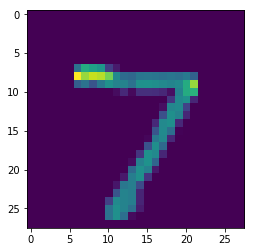

In [12]:
import numpy as np
print(np.argmax(predictions[0]))
print(y_test[0])
plt.imshow(x_test[0])
plt.show()